In [1]:
from os import listdir
from dotenv import dotenv_values
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

exp_path = '../experiments'
decagon_AUPRC = 0.832
transductive_AUPRC = 0.971

# Actual PPSE performance by psi value

In [2]:
# Read polySE results using aggregations in place of embeddings
polySE_true_dfs = []
for loc in listdir(exp_path):
    if loc.startswith('2024'):
        df = pd.read_csv(f'{exp_path}/{loc}/polySE_results_real_embeds.csv')
        df['psi'] = float(loc.split('psi_')[-1])
        df['Training'] = 'Out-of-sample LibKGE training'
        polySE_true_dfs.append(df)

# Also read equivalent results from chapter 3
chap3_path = dotenv_values()['THESIS_PATH'] + '/Chapter3/analysis/assessment/best_trials_assess/20230929-111630-simple_selfloops/results_full.csv'
df_c3 = pd.read_csv(chap3_path)
df_c3['psi'] = 0.0
df_c3['Training'] = 'Standard LibKGE training'
polySE_true_dfs.append(df_c3)

polySE_true = pd.concat(polySE_true_dfs)
polySE_true

,Relation,AUROC,AUPRC,AP@50,psi,Training
0,C0005779,0.978010,0.968558,1.000000,0.125,Out-of-sample LibKGE training
1,C0011991,0.972084,0.959103,1.000000,0.125,Out-of-sample LibKGE training
2,C0011860,0.980377,0.973008,1.000000,0.125,Out-of-sample LibKGE training
3,C0038395,0.972707,0.964872,1.000000,0.125,Out-of-sample LibKGE training
4,C1145670,0.967355,0.953580,1.000000,0.125,Out-of-sample LibKGE training
...,...,...,...,...,...,...
958,C0016665,0.995556,0.996028,1.000000,0.000,Standard LibKGE training
959,C0006846,0.996618,0.996923,1.000000,0.000,Standard LibKGE training
960,C0025637,0.995932,0.995983,0.978775,0.000,Standard LibKGE training
961,C0426636,0.996998,0.996954,1.000000,0.000,Standard LibKGE training


In [3]:
for psi, subdf in polySE_true.groupby('psi'):
    print(f'At psi = {psi}, median AUPRC = {subdf.AUPRC.median():.5f}')

At psi = 0.0, median AUPRC = 0.97138
At psi = 0.125, median AUPRC = 0.97143
At psi = 0.25, median AUPRC = 0.97155
At psi = 0.5, median AUPRC = 0.97184
At psi = 0.75, median AUPRC = 0.97129


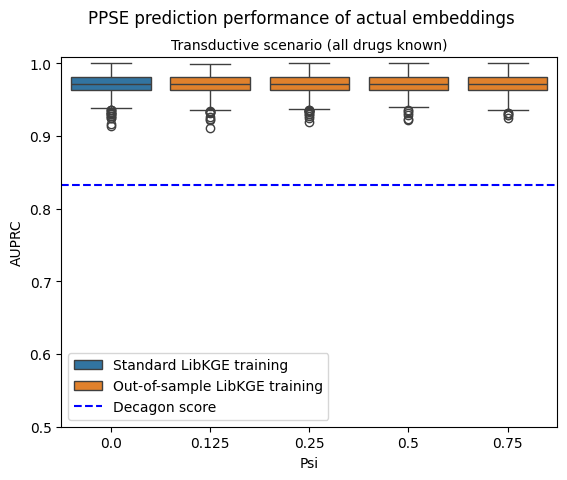

In [4]:
plt.clf()
sns.boxplot(polySE_true, x='psi', y='AUPRC', hue='Training')
xmin = -0.5
xmax = 4.5
plt.hlines(decagon_AUPRC, xmin=xmin, xmax=xmax, colors='blue', linestyles='dashed', label='Decagon score')
plt.suptitle('PPSE prediction performance of actual embeddings')
plt.title('Transductive scenario (all drugs known)', size=10)
plt.xlabel('Psi')
plt.ylim(bottom=0.5)
plt.xlim(xmin, xmax)
plt.legend()
plt.savefig('polySE_true_embeds.png')

# Cosine similarities of aggregated vectors to true embeddings

In [5]:
# Read cosine data
cosine_dfs = []
for loc in listdir(exp_path):
    if loc.startswith('2024'):
        df = pd.read_csv(f'{exp_path}/{loc}/cosines_vs_actual.csv')
        df['psi'] = float(loc.split('psi_')[-1])
        df['Training'] = 'Out-of-sample LibKGE training'
        cosine_dfs.append(df)

# Also read equivalent results from chapter 4
chap4_path = dotenv_values()['THESIS_PATH'] + '/Chapter4/data/results/cosines_vs_actual.csv'
df_c4= pd.read_csv(chap4_path)
df_c4 = df_c4.query('vector_method == "mean components" and neighbourhood_method == "drug similarity"')
df_c4['psi'] = 0.0
df_c4['Training'] = 'Standard LibKGE training'
df_c4['cosine_to_actual'] = df_c4['cosine_sim']
df_c4.drop(columns=['cosine_sim'], inplace=True)
cosine_dfs.append(df_c4)

cosines = pd.concat(cosine_dfs)
cosines

,drug,neighbourhood_method,vector_method,cosine_to_actual,psi,Training
0,CID000003954,drug similarity,mean components,0.908281,0.125,Out-of-sample LibKGE training
1,CID000004829,drug similarity,mean components,0.736625,0.125,Out-of-sample LibKGE training
2,CID000004140,drug similarity,mean components,0.937705,0.125,Out-of-sample LibKGE training
3,CID000002909,drug similarity,mean components,0.908819,0.125,Out-of-sample LibKGE training
4,CID000003676,drug similarity,mean components,0.472086,0.125,Out-of-sample LibKGE training
...,...,...,...,...,...,...
5467,CID006435110,drug similarity,mean components,0.717333,0.000,Standard LibKGE training
5479,CID006436173,drug similarity,mean components,0.499533,0.000,Standard LibKGE training
5485,CID006447131,drug similarity,mean components,0.604204,0.000,Standard LibKGE training
5491,CID006918453,drug similarity,mean components,0.588499,0.000,Standard LibKGE training


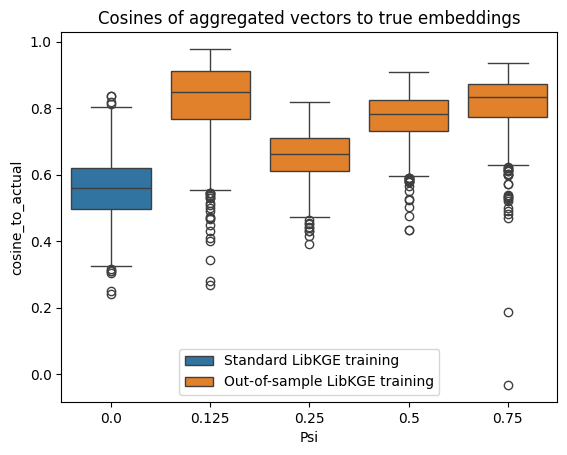

In [6]:
plt.clf()
sns.boxplot(cosines, x='psi', y='cosine_to_actual', hue='Training')
plt.title('Cosines of aggregated vectors to true embeddings')
plt.xlabel('Psi')
plt.legend()
plt.savefig('cosines_vs_actual.png')

# PPSE performance using the aggregated vectors

In [7]:
# Read standard polySE results (i.e. using actual embeddings)
polySE_agg_dfs = []
for loc in listdir(exp_path):
    if loc.startswith('2024'):
        df = pd.read_csv(f'{exp_path}/{loc}/polySE_results_aggregations.csv')
        df['psi'] = float(loc.split('psi_')[-1])
        df['Training'] = 'Out-of-sample LibKGE training'
        polySE_agg_dfs.append(df)

# Also read equivalent results from chapter 3
chap4_agg_path = dotenv_values()['THESIS_PATH'] + '/Chapter4/data/results/polySE.csv'
chap4_agg = pd.read_csv(chap4_agg_path)
chap4_agg = chap4_agg.query('vector_method == "mean components" and neighbourhood_method == "drug similarity"')
chap4_agg['psi'] = 0.0
chap4_agg['Training'] = 'Standard LibKGE training'
chap4_agg.drop(columns=['neighbourhood_method', 'vector_method'], inplace=True)
polySE_agg_dfs.append(chap4_agg)

polySE_agg = pd.concat(polySE_agg_dfs)
polySE_agg

,side_effect,fake_triple_component,AUROC,AUPRC,AP50,psi,Training
0,C0000731,head,0.500000,0.500000,0.275912,0.125,Out-of-sample LibKGE training
1,C0000731,tail,0.500000,0.500000,0.275912,0.125,Out-of-sample LibKGE training
2,C0000731,both,0.500000,0.500000,0.275912,0.125,Out-of-sample LibKGE training
3,C0000737,head,0.677856,0.666066,0.674826,0.125,Out-of-sample LibKGE training
4,C0000737,tail,0.703890,0.697459,0.660958,0.125,Out-of-sample LibKGE training
...,...,...,...,...,...,...,...
23080,C0005001,head,0.759702,0.745933,0.902196,0.000,Standard LibKGE training
23081,C0005001,tail,0.841094,0.828883,0.939010,0.000,Standard LibKGE training
23103,C0020625,both,0.568307,0.549721,0.240306,0.000,Standard LibKGE training
23104,C0020625,head,0.790351,0.766044,0.950610,0.000,Standard LibKGE training


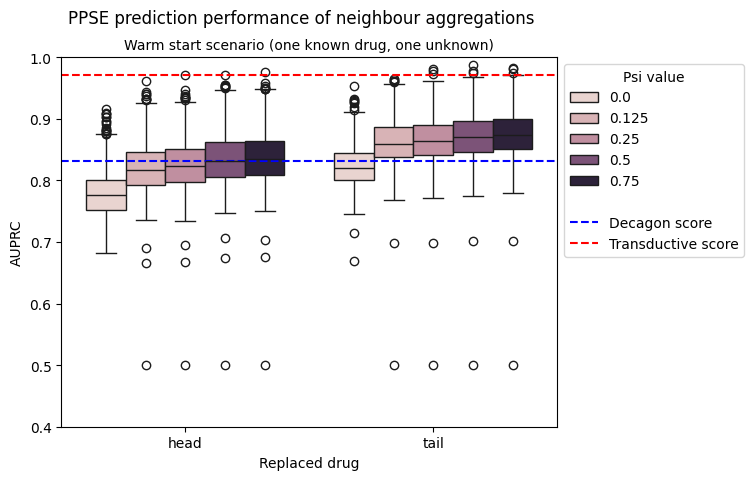

In [8]:
warm_start = polySE_agg.query('fake_triple_component != "both"')
sns.boxplot(warm_start, x='fake_triple_component', y='AUPRC', hue='psi')

xmin = -0.5
xmax = 1.5
plt.hlines(-2, xmin=xmin, xmax=xmax, colors='white', linestyles='dashed', label=' ')  # To add gap in legend
plt.hlines(decagon_AUPRC, xmin=xmin, xmax=xmax, colors='blue', linestyles='dashed', label='Decagon score')
plt.hlines(transductive_AUPRC, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', label='Transductive score')
plt.ylim(0.4, 1)
plt.xlim(xmin, xmax)
plt.legend(title='Psi value', bbox_to_anchor=(1, 1))
plt.suptitle('PPSE prediction performance of neighbour aggregations')
plt.title('Warm start scenario (one known drug, one unknown)', size=10)
plt.xlabel('Replaced drug')

plt.savefig('polySE_agg_warm_start.png')

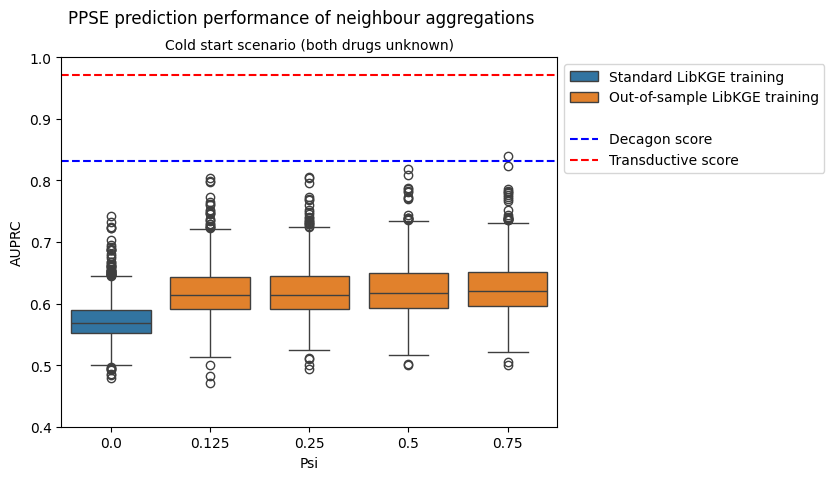

In [9]:
cold_start = polySE_agg.query('fake_triple_component == "both"')
sns.boxplot(cold_start, x='psi', y='AUPRC', hue='Training')

xmin = -0.5
xmax = 4.5
plt.xlim(xmin, xmax)
plt.hlines(-2, xmin=xmin, xmax=xmax, colors='white', linestyles='dashed', label=' ')  # To add gap in legend
plt.hlines(decagon_AUPRC, xmin=xmin, xmax=xmax, colors='blue', linestyles='dashed', label='Decagon score')
plt.hlines(transductive_AUPRC, xmin=xmin, xmax=xmax, colors='red', linestyles='dashed', label='Transductive score')
plt.ylim(0.4, 1.0)
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle('PPSE prediction performance of neighbour aggregations')
plt.title('Cold start scenario (both drugs unknown)', size=10)
plt.xlabel('Psi')


plt.savefig('polySE_agg_cold_start.png')